In [1]:
from sympy import *


In [2]:
# the variable x and the function y
x = symbols("x")
y = Function("y")(x)


In [3]:
# Example 5.1.1
DE = Eq(y.diff(), 4 * y / (x * y - 3 * x))
DE


Eq(Derivative(y(x), x), 4*y(x)/(x*y(x) - 3*x))

In [4]:
# Solve the DE
dsolve(DE, y, simplify=False)


[Eq(y(x), -3*LambertW(-(C1/x**4)**(1/3)/3)),
 Eq(y(x), -3*LambertW((C1/x**4)**(1/3)*(1 - sqrt(3)*I)/6)),
 Eq(y(x), -3*LambertW((C1/x**4)**(1/3)*(1 + sqrt(3)*I)/6))]

In [5]:
# Default simplify = True
dsolve(DE, y)


[Eq(y(x), -3*LambertW(-(C1/x**4)**(1/3)/3)),
 Eq(y(x), -3*LambertW((C1/x**4)**(1/3)*(1 - sqrt(3)*I)/6)),
 Eq(y(x), -3*LambertW((C1/x**4)**(1/3)*(1 + sqrt(3)*I)/6))]

In [6]:
# Example 5.1.2
DE = Eq(y.diff(), y**2)
DE


Eq(Derivative(y(x), x), y(x)**2)

In [7]:
dsolve(DE, y, simplify=False)


Eq(-1/y(x), C1 + x)

In [8]:
# Example 5.2
DE = Eq(y.diff(), x / y**2)
DE


Eq(Derivative(y(x), x), x/y(x)**2)

In [9]:
dsolve(DE, y, simplify=False)


Eq(y(x)**3/3, C1 + x**2/2)

In [10]:
# Solve the IVP
y = Function("y")
dsolve(DE, y(x), ics={y(0): 1})


Eq(y(x), (3*x**2/2 + 1)**(1/3))

In [11]:
# Example 5.3
y = Function("y")(x)
DE = Eq(y.diff(), (x**2 - y**2) / (2 * x * y))
DE


Eq(Derivative(y(x), x), (x**2 - y(x)**2)/(2*x*y(x)))

In [12]:
dsolve(DE, y, simplify=False)


[Eq(y(x), -sqrt(3)*sqrt(C1/x + x**2)/3), Eq(y(x), sqrt(3)*sqrt(C1/x + x**2)/3)]

In [13]:
# Example 5.4
DE = Eq(y.diff(), -2 * y / (3 * x - y))
DE


Eq(Derivative(y(x), x), -2*y(x)/(3*x - y(x)))

In [14]:
dsolve(DE, y, simplify=False)


Eq(log(y(x)), log(C1) - 2*log(5*x/y(x) - 1)/5)

In [15]:
# Example 5.5
DE = Eq(y.diff() + 2 * y / x, x - 1)
DE


Eq(Derivative(y(x), x) + 2*y(x)/x, x - 1)

In [16]:
dsolve(DE, y, simplify=False)


Eq(y(x), C1/x**2 + x**2/4 - x/3)

In [17]:
y = Function("y")
dsolve(DE, y(x), simplify=False, ics={y(1): 0})


Eq(y(x), x**2/4 - x/3 + 1/(12*x**2))

In [18]:
# Example 5.6
y = Function("y")(x)
DE = Eq((1 + x**2) * y.diff() + (1 - x) ** 2 * y, x * exp(-x))
DE


Eq((1 - x)**2*y(x) + (x**2 + 1)*Derivative(y(x), x), x*exp(-x))

In [19]:
dsolve(DE, y, simplify=True)


Eq(y(x), (C1*x**2 + C1 - 1/2)*exp(-x))

In [20]:
DE = Eq(y**2 - x**2 + (2 * x * y + 1) * y.diff(), 0)
DE


Eq(-x**2 + (2*x*y(x) + 1)*Derivative(y(x), x) + y(x)**2, 0)

In [21]:
dsolve(DE, y, simplify=False)


KeyboardInterrupt: 

In [22]:
# Example 5.8
DE = Eq(y.diff(), -(2 * y - 1) / (2 * x - y + 2))
DE


Eq(Derivative(y(x), x), (1 - 2*y(x))/(2*x - y(x) + 2))

In [23]:
dsolve(DE, y, simplify=False)


Eq(log(y(x) - 1/2), log(C1) - log(4*(x + 3/4)/(y(x) - 1/2) - 1)/2)

In [24]:
DE = Eq(2 * x**2 * y + y**2 + (2 * x**3 - x * y) * y.diff(), 0)
DE


Eq(2*x**2*y(x) + (2*x**3 - x*y(x))*Derivative(y(x), x) + y(x)**2, 0)

In [25]:
dsolve(DE, y, simplify=False)


NotImplementedError: The given ODE Derivative(y(x), x) - (-2*x**2 - y(x))*y(x)/(x*(2*x**2 - y(x))) cannot be solved by the factorable group method

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp


# define the function f(x,y)
def f(x, y):
    return (2 * x**2 * y + y**2) / (x * y - 2 * x**3)


# Solve the ODE numerically with y(0) = 1
sol = solve_ivp(f, [1, 10], [1], t_eval=np.arange(1, 10, 0.2))
sol


  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 1.000e+00  1.200e+00 ...  9.600e+00  9.800e+00]
        y: [[ 1.000e+00  6.825e-01 ...  7.250e-02  7.102e-02]]
      sol: None
 t_events: None
 y_events: None
     nfev: 44
     njev: 0
      nlu: 0

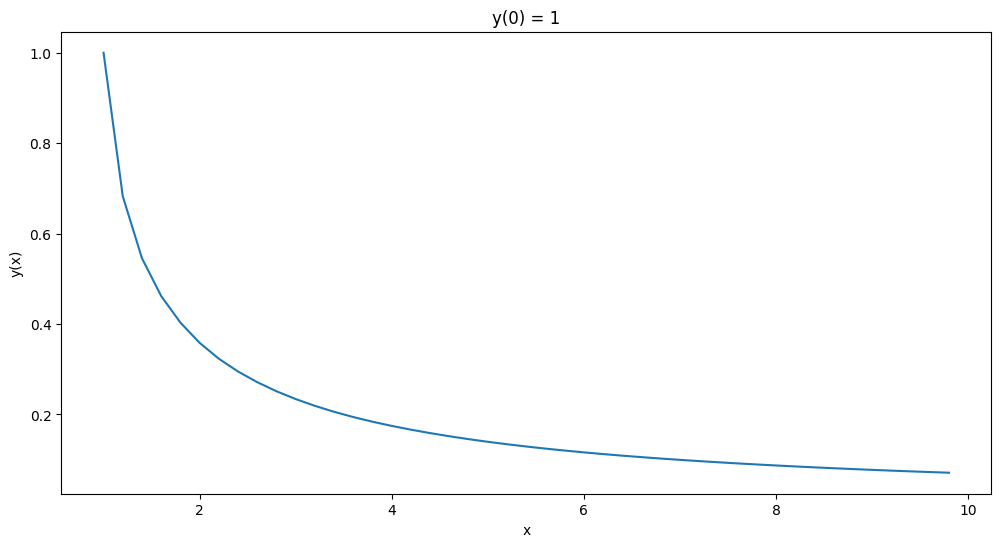

In [27]:
# Plot the solution
plt.figure(figsize=(12, 6))
for y in sol.y:
    plt.plot(sol.t, y)
plt.xlabel("x")
plt.ylabel("y(x)")
plt.title("y(0) = 1")
plt.show()


In [28]:
# Solve the ODE numerically with y(0) = 3
sol = solve_ivp(f, [1, 10], [3], t_eval=np.arange(1, 10, 0.2))
sol


  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 1.000e+00  1.200e+00 ...  9.600e+00  9.800e+00]
        y: [[ 3.000e+00  5.805e+00 ...  5.463e+02  5.695e+02]]
      sol: None
 t_events: None
 y_events: None
     nfev: 38
     njev: 0
      nlu: 0

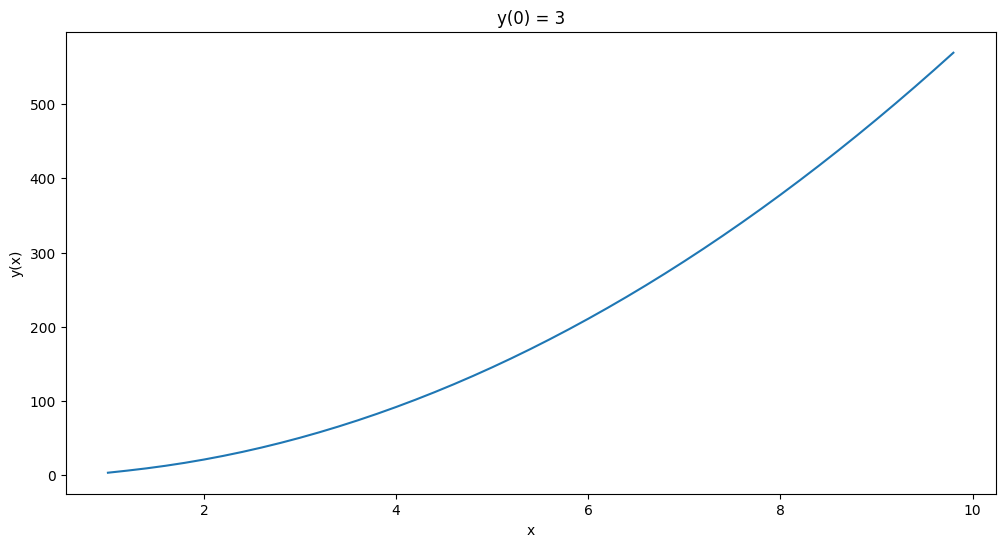

In [29]:
# Plot the solution
plt.figure(figsize=(12, 6))
for y in sol.y:
    plt.plot(sol.t, y)
plt.xlabel("x")
plt.ylabel("y(x)")
plt.title("y(0) = 3")
plt.show()
